# **CS 1810 Homework 0**
---
To account for potential version issues, try the following in your terminal:

1. Create a new environment with `python3 -m venv venv`
2. Activate that environment with `source venv/bin/activate`
3. Make sure the interpreter in the top right corner of your VSCode (or whatever u use to run ur code is venv).
4. If you get a "install kernel" message, press it.
5. Run `pip install -r requirements.txt`
6. Run the remainder of this notebook.

Note that this is not necessary (especially for hw0) but can help prevent any issues due to package versions.

In [1]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal as mvn

## 1.6 Implement the solution for $\mathbf{w}$.

In [7]:
x1 ,y1 = 1,2 
x2, y2 = 3,4

X = np.array( [
    [1, x1],
    [1, x2]
    
])

y = np.array([
    
    [y1],
    [y2]    
    
    ])

w = np.linalg.inv(X) @ y

print(X)
print(y)
print("w=",w)

[[1 1]
 [1 3]]
[[2]
 [4]]
w= [[1.]
 [1.]]


## 2.1 Plot $y = -3x^2 + 72x + 70$.

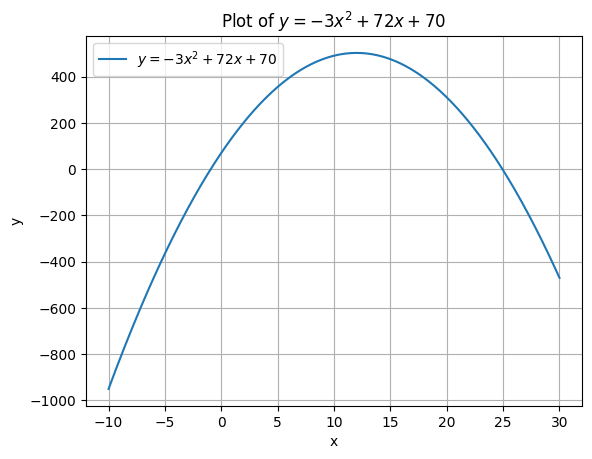

In [10]:

x = np.linspace(-10, 30, 400)

# Define the function
y = -3*x**2 + 72*x + 70

# Plot
plt.figure()
plt.plot(x, y, label=r"$y = -3x^2 + 72x + 70$")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Plot of $y = -3x^2 + 72x + 70$")
plt.legend()
plt.grid(True)
plt.show()


## 2.3 Plot $f(x_1, x_2)$.

Text(0.5, 0.92, 'Plant Height as a Function of Water and Sunlight')

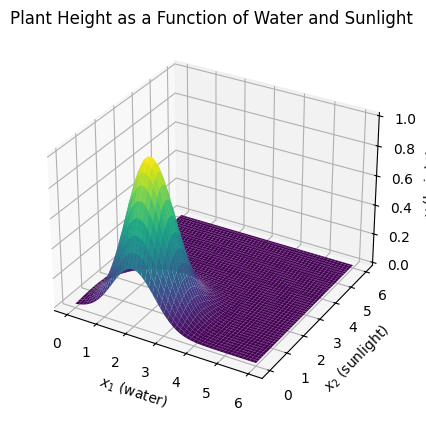

In [11]:
from mpl_toolkits.mplot3d import Axes3D 
x1 = np.linspace(0, 6, 200)
x2 = np.linspace(0, 6, 200)
X1, X2 = np.meshgrid(x1, x2)
Y = np.exp(-(X1 - 2)**2 - (X2 - 1)**2)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X1, X2, Y, cmap='viridis')

ax.set_xlabel(r"$x_1$ (water)")
ax.set_ylabel(r"$x_2$ (sunlight)")
ax.set_zlabel(r"$y$ (height)")
ax.set_title("Plant Height as a Function of Water and Sunlight")


## 3.1(b) Draw from joint distribution of $(S, W)$ and generate bivariate histogram.

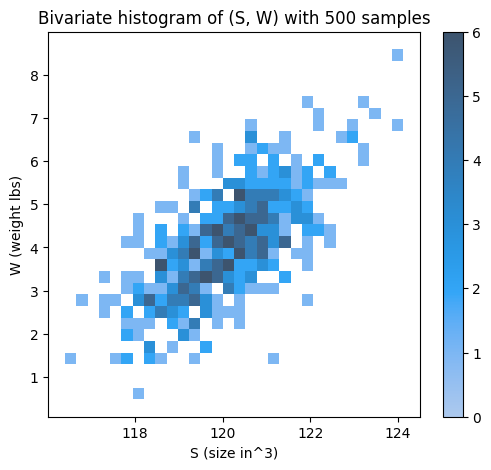

Theoretical mean (and true mode) mu = [120   4]
Empirical sample mean            = [120.10229938   4.09405531]
Most likely sampled point (MAP among samples) = [120.02871617   4.03414798]
Difference (sample mean - mu)    = [0.10229938 0.09405531]


In [12]:
mu = np.array([120, 4])
Sigma = np.array([[1.5, 1.0],
                  [1.0, 1.5]])

rng = np.random.default_rng(0) 
samples = rng.multivariate_normal(mean=mu, cov=Sigma, size=500)

S = samples[:, 0]
W = samples[:, 1]

plt.figure(figsize=(6, 5))
sns.histplot(x=S, y=W, bins=30, pmax=0.9, cbar=True)
plt.xlabel("S (size in^3)")
plt.ylabel("W (weight lbs)")
plt.title("Bivariate histogram of (S, W) with 500 samples")
plt.show()

emp_mean = samples.mean(axis=0)
rv = mvn(mean=mu, cov=Sigma)
pdf_vals = rv.pdf(samples)
emp_mode_like = samples[np.argmax(pdf_vals)]

print("Theoretical mean (and true mode) mu =", mu)
print("Empirical sample mean            =", emp_mean)
print("Most likely sampled point (MAP among samples) =", emp_mode_like)
print("Difference (sample mean - mu)    =", emp_mean - mu)

## 3.2 Plot the joint PDFs at $S=118$ and $S=122$, varying $W$.

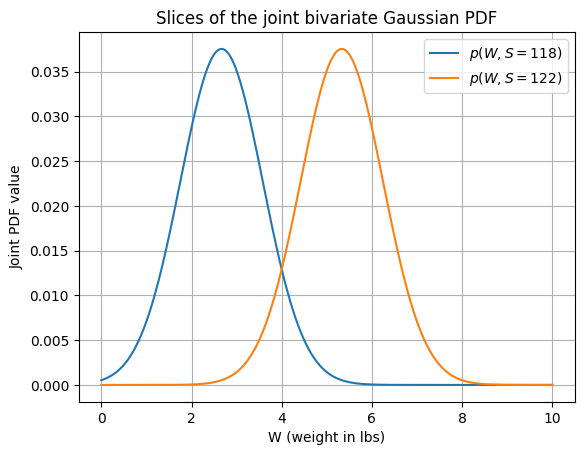

In [13]:
mu = np.array([120, 4])
Sigma = np.array([[1.5, 1.0],
                  [1.0, 1.5]])

rv = mvn(mean=mu, cov=Sigma)

W_vals = np.linspace(0, 10, 1001)

def joint_slice_pdf(S_fixed):
    pts = np.column_stack([np.full_like(W_vals, S_fixed), W_vals])
    return rv.pdf(pts)

pdf_S118 = joint_slice_pdf(118)
pdf_S122 = joint_slice_pdf(122)

plt.figure()
plt.plot(W_vals, pdf_S118, label=r"$p(W, S=118)$")
plt.plot(W_vals, pdf_S122, label=r"$p(W, S=122)$")
plt.xlabel("W (weight in lbs)")
plt.ylabel("Joint PDF value")
plt.title("Slices of the joint bivariate Gaussian PDF")
plt.legend()
plt.grid(True)
plt.show()

## 3.5(a) Function to simulate draws from $T^{*}$.

In [14]:
mu = np.array([120.0, 4.0])  
Sigma = np.array([[1.5, 1.0],
                  [1.0, 1.5]])

eps_var = 5.0  
eps_std = np.sqrt(eps_var)

def simulate_T_star(rng=None):
    """
    Simulate one draw of T*:
      1) Sample N = sum_{h=1}^{24} P_h, where P_h ~ Pois(3) iid
      2) Sample (S_i, W_i) iid ~ N(mu, Sigma)
      3) Sample eps_i iid ~ N(0, 5)
      4) Compute T_i = 60 + 0.6 W_i + 0.2 S_i + eps_i
      5) Return T* = sum_i T_i
    """
    if rng is None:
        rng = np.random.default_rng()
    P = rng.poisson(lam=3.0, size=24)
    N = int(P.sum())
    if N == 0:
        return 0.0  
    SW = rng.multivariate_normal(mean=mu, cov=Sigma, size=N)
    S = SW[:, 0]
    W = SW[:, 1]
    eps = rng.normal(loc=0.0, scale=eps_std, size=N) 
    T = 60.0 + 0.6 * W + 0.2 * S + eps
    return float(T.sum())

## 3.5(b) Empirically estimate the mean and standard deviation of $T^{*}$ by generating $1000$ samples.

In [15]:
rng = np.random.default_rng(0)  

samples = np.array([simulate_T_star(rng) for _ in range(1000)])

emp_mean = samples.mean()
emp_std = samples.std(ddof=1) 

print("Empirical mean of T*:", emp_mean)
print("Empirical std of T* :", emp_std)

Empirical mean of T*: 6220.701984142003
Empirical std of T* : 735.682579717596


# 4.1: Examining the Data

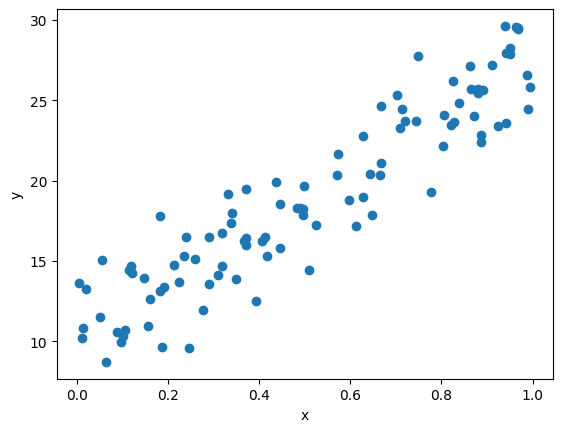

In [19]:
# Steve's solution
data = pd.read_csv("data/points.csv")
plt.scatter(data["x"], data["y"])
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## 4.2: Adding the Intercept/Bias Term

In [23]:
# Steve's solution
intercept = np.ones((x.shape[0],1 ))
x_col = x.reshape(-1, 1)
X = np.hstack([intercept, x_col]) # horizontally stack the ones and x coordinates next to each other
print (X)


[[ 1.          0.52402311]
 [ 1.         17.24737225]]


## 4.4: Implementing the LinearRegression Class

In [25]:
# Steve's solution
class LinearRegression:
    def __init__(self):
        self.w = None

    def fit(self, X, y):
        """
        Fit linear model to the data, estimating weights w.
        """
        self.w = np.linalg.inv(X.T @ X) @ X.T @ y
        return self.w

    def predict(self,X):
        """
        Use fitted weights to predict target y given input features X.
        """
        return X @ self.w

FileNotFoundError: [Errno 2] No such file or directory: 'img_output/hw0_p4_4.png'

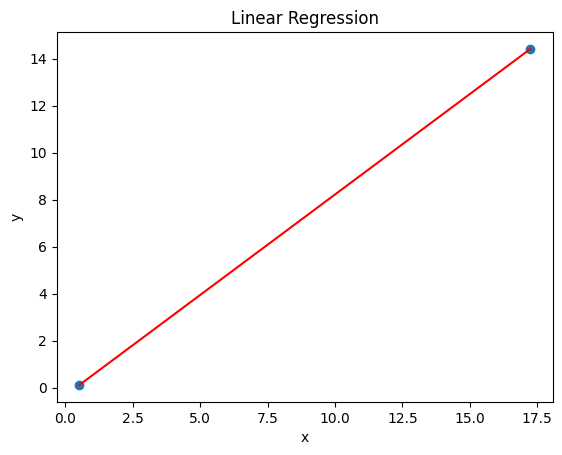

In [26]:
### DON'T MODIFY THIS CELL

# Fit the linear regression
lr = LinearRegression()
lr.fit(X, y)
y_pred = lr.predict(X)
# Plot the data and the regression line
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], y_pred, color='red')
plt.title("Linear Regression")
plt.xlabel("x")
plt.ylabel("y")
plt.savefig('img_output/hw0_p4_4.png')
plt.show()

## 4.5 MSE Computation

In [28]:
residuals = y - y_pred
mse = (residuals @ residuals) / len(y)
print(mse)

1.8797076257219422e-30
